In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'heart-failure-clinical-records-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1498381%2F2475919%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240225%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240225T064626Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9c66988293238a347c4a2dbfda640fead452c3c794c7bfe58bd1f79fb3725ef9abe0574f2382e1ff92f0356b084cdfe39916bfcec06626698e8176a5606dabb3f673a642c3f48d1d0589ae568b43bda35160c11872bc13e230e424225cfcc6444460eab516ca2f02c9c3dc05fa16370b1f863cea4a28a17273f8ab3abb4e5a69de5ee33ab128fccfd402cca12e6b193a22cf2b1a11c56ce105f13b9c15a1ee106bd43f31dad0fdfbc07a7e192fadfb704e3085c016721c0cb135270b68e665acf15b23c45d44bf7562a8f30c29f444dec1452766d341822e18a9101469bd91ddd2ee19704324259525ae3a9cbfa8e89819164c02f02b7ca147eafd33453ee377'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4083 bytes downloaded
Downloaded and uncompressed: heart-failure-clinical-records-dataset
Data source import complete.


# git hub link
https://github.com/Sushey01/Data-Analysis-Assignment.git

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-records-dataset/Heart_failure_clinical_records_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from plotnine import ggplot, aes, geom_point, geom_smooth, labs
from pandas.api.types import CategoricalDtype


In [ ]:

# Read the dataset
df = pd.read_csv("/kaggle/input/heart-failure-clinical-records-dataset/Heart_failure_clinical_records_dataset.csv")

In [ ]:
# Convert infinite values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# View the first few rows
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Check for missing values
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# Check for duplicated rows
df.duplicated().sum()

0

In [ ]:
# Display basic information about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# Filter male (sex=1)
male_df = df[df['sex'] == 1]

In [ ]:
# Filter female (sex=0)
female_df = df[df['sex'] == 0]

In [ ]:
# Filter death event
death_event_1_df = df[df['DEATH_EVENT'] == 1]

In [ ]:
# Visualizing Data Overview
fig = go.Figure(data=[go.Bar(x=df['DEATH_EVENT'].astype(str).replace({'0': 'Alive', '1': 'Dead'}).value_counts().index,
                             y=df['DEATH_EVENT'].astype(str).replace({'0': 'Alive', '1': 'Dead'}).value_counts().values)])

fig.update_layout(title_text="Distribution of DEATH_EVENT")
fig.show()

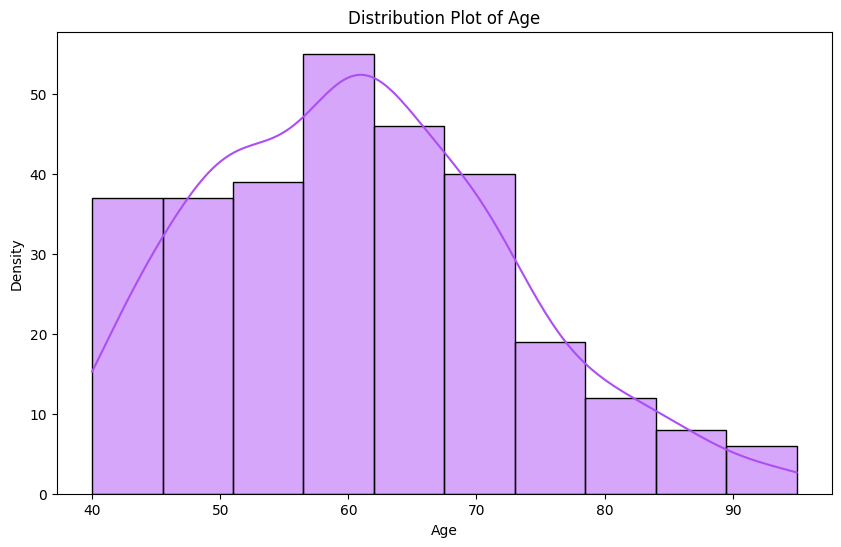

In [ ]:
# Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='#AD4EF5')
plt.title('Distribution Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Anaemia


In [ ]:
fig = go.Figure(data=[go.Histogram(x=df['anaemia'].astype(str).replace({'0': 'No', '1': 'Yes'}), marker=dict(color='#D2CDD7'))])
fig.update_layout(title_text="Histogram of Anaemia", xaxis_title="Anaemia", yaxis_title="Count")
fig.show()

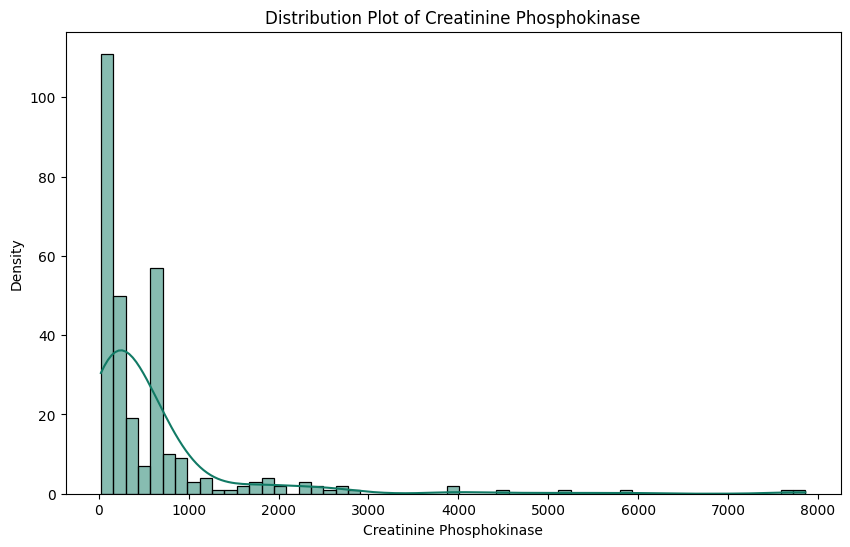

In [ ]:
# Creatinine Phosphokinase
plt.figure(figsize=(10, 6))
sns.histplot(df['creatinine_phosphokinase'], kde=True, color='#117A65')
plt.title('Distribution Plot of Creatinine Phosphokinase')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Density')
plt.show()

In [ ]:
# Diabetes
fig = go.Figure(data=[go.Histogram(x=df['diabetes'].astype(str).replace({'0': 'No', '1': 'Yes'}), marker=dict(color='#D2CDD7'))])
fig.update_layout(title_text="Histogram of Diabetes", xaxis_title="Diabetes", yaxis_title="Count")
fig.show()

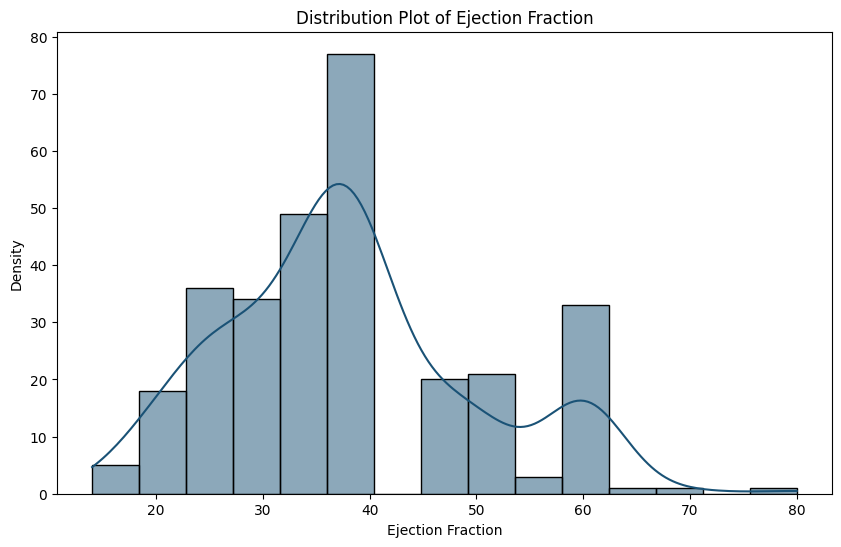

In [ ]:
# Ejection Fraction
plt.figure(figsize=(10, 6))
sns.histplot(df['ejection_fraction'], kde=True, color='#1A5276')
plt.title('Distribution Plot of Ejection Fraction')
plt.xlabel('Ejection Fraction')
plt.ylabel('Density')
plt.show()

In [ ]:

# High Blood Pressure
fig = go.Figure(data=[go.Histogram(x=df['high_blood_pressure'].astype(str).replace({'0': 'No', '1': 'Yes'}), marker=dict(color='#D2CDD7'))])
fig.update_layout(title_text="Histogram of High Blood Pressure", xaxis_title="High Blood Pressure", yaxis_title="Count")
fig.show()

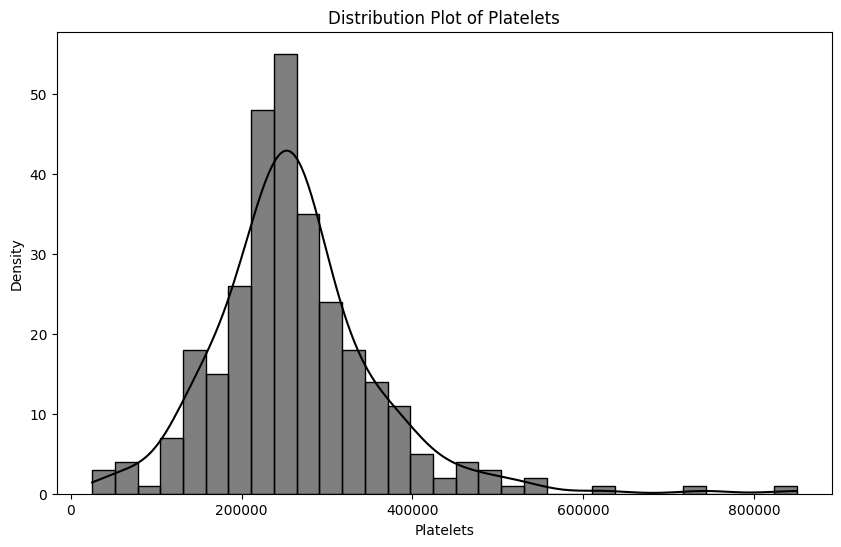

In [ ]:
# Platelets
plt.figure(figsize=(10, 6))
sns.histplot(df['platelets'], kde=True, color='black')
plt.title('Distribution Plot of Platelets')
plt.xlabel('Platelets')
plt.ylabel('Density')
plt.show()

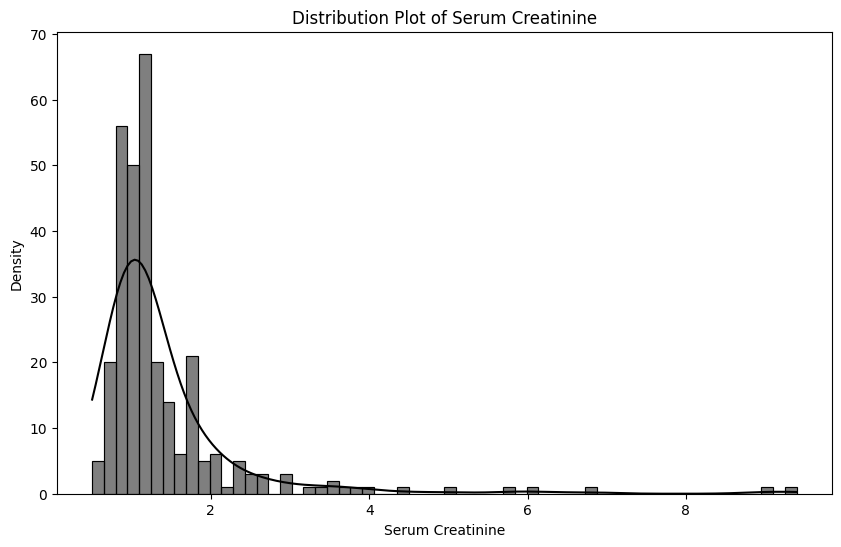

In [ ]:
# Serum Creatinine
plt.figure(figsize=(10, 6))
sns.histplot(df['serum_creatinine'], kde=True, color='black')
plt.title('Distribution Plot of Serum Creatinine')
plt.xlabel('Serum Creatinine')
plt.ylabel('Density')
plt.show()

Number of outliers: 29


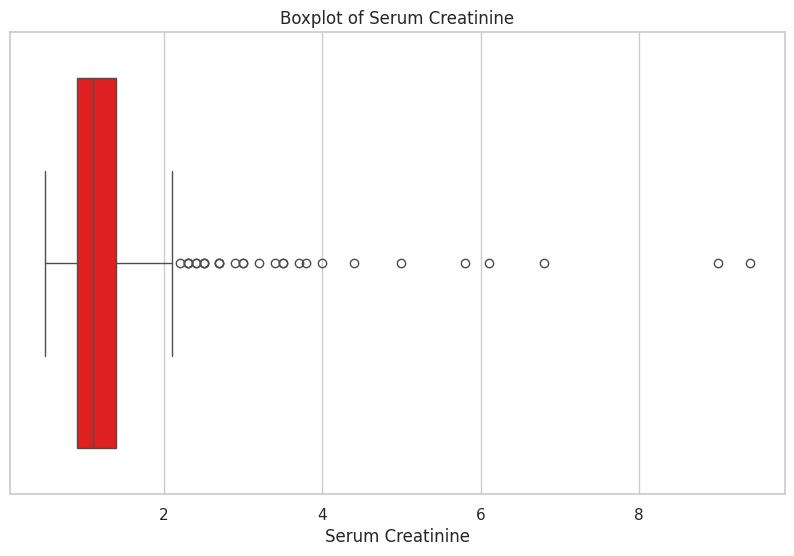

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x=df['serum_creatinine'], color='red')

# Set the title and labels
plt.title('Boxplot of Serum Creatinine')
plt.xlabel('Serum Creatinine')

# Count outliers
Q1 = df['serum_creatinine'].quantile(0.25)
Q3 = df['serum_creatinine'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['serum_creatinine'] < Q1 - 1.5 * IQR) | (df['serum_creatinine'] > Q3 + 1.5 * IQR)]
num_outliers = len(outliers)
print("Number of outliers:", num_outliers)

# Show the plot
plt.show()

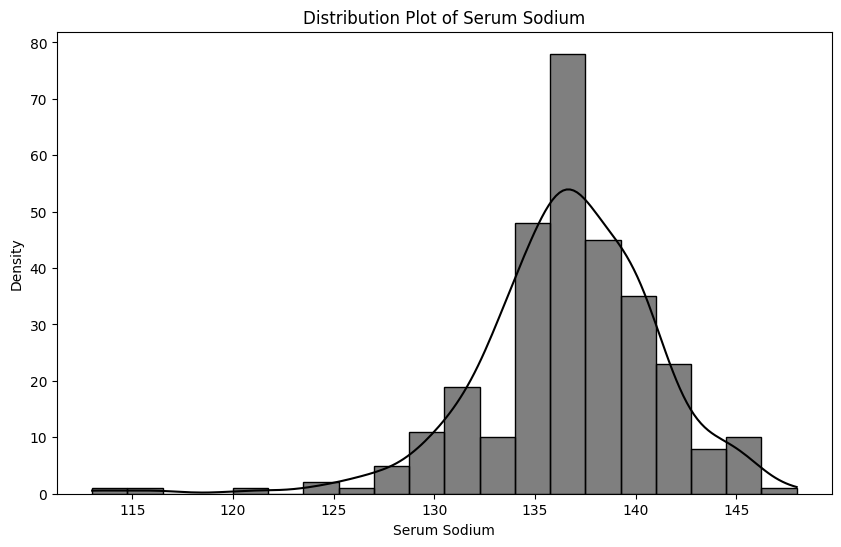

In [ ]:
# Serum Sodium
plt.figure(figsize=(10, 6))
sns.histplot(df['serum_sodium'], kde=True, color='black')
plt.title('Distribution Plot of Serum Sodium')
plt.xlabel('Serum Sodium')
plt.ylabel('Density')
plt.show()

In [ ]:
# Sex
fig = go.Figure(data=[go.Histogram(x=df['sex'].astype(str).replace({'0': 'Female', '1': 'Male'}), marker=dict(color='#D2CDD7'))])
fig.update_layout(title_text="Histogram of Sex", xaxis_title="Sex", yaxis_title="Count")
fig.show()

In [ ]:
# Smoking
fig = go.Figure(data=[go.Histogram(x=df['smoking'].astype(str).replace({'0': 'No', '1': 'Yes'}), marker=dict(color='#D2CDD7'))])
fig.update_layout(title_text="Histogram of Smoking", xaxis_title="Smoking", yaxis_title="Count")
fig.show()

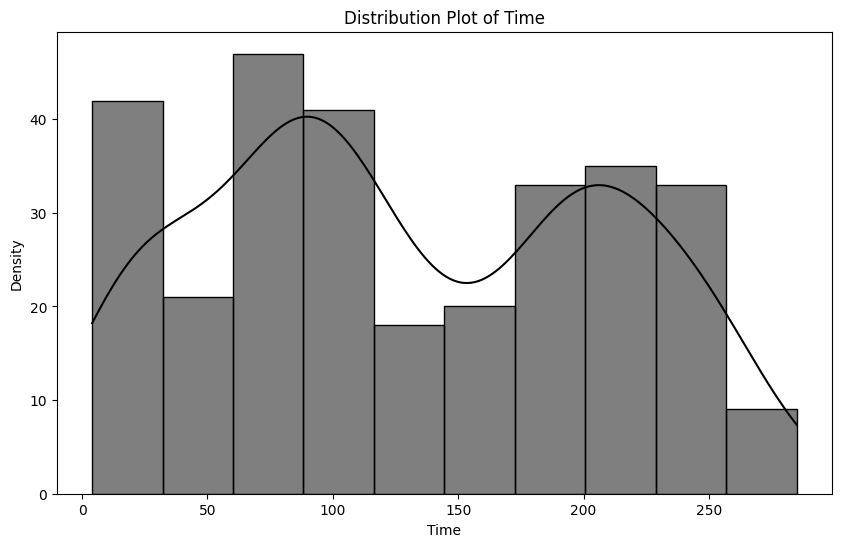

In [ ]:
# Time
plt.figure(figsize=(10, 6))
sns.histplot(df['time'], kde=True, color='black')
plt.title('Distribution Plot of Time')
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()

In [ ]:
# Gender and Death Event
male_normal = male_df[male_df['DEATH_EVENT'] == 0]
male_heart_failure = male_df[male_df['DEATH_EVENT'] == 1]
female_normal = female_df[female_df['DEATH_EVENT'] == 0]
female_heart_failure = female_df[female_df['DEATH_EVENT'] == 1]

labels = ['Male - Normal', 'Male - Heart failure', 'Female - Normal', 'Female - Heart failure']
values = [male_normal.shape[0], male_heart_failure.shape[0], female_normal.shape[0], female_heart_failure.shape[0]]

fig1 = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig1.update_layout(title_text='Analysis on Survival - Gender')
fig1.show()

<ipython-input-63-f1a935f7c04d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-63-f1a935f7c04d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



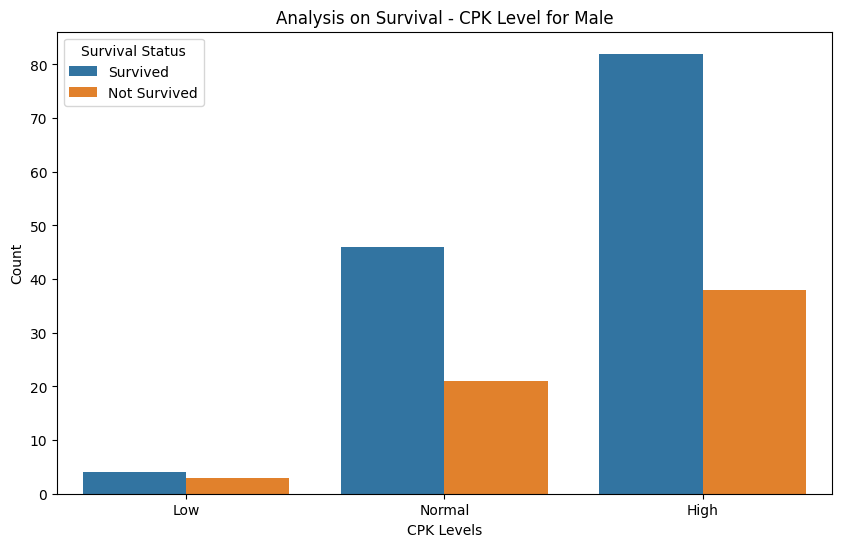

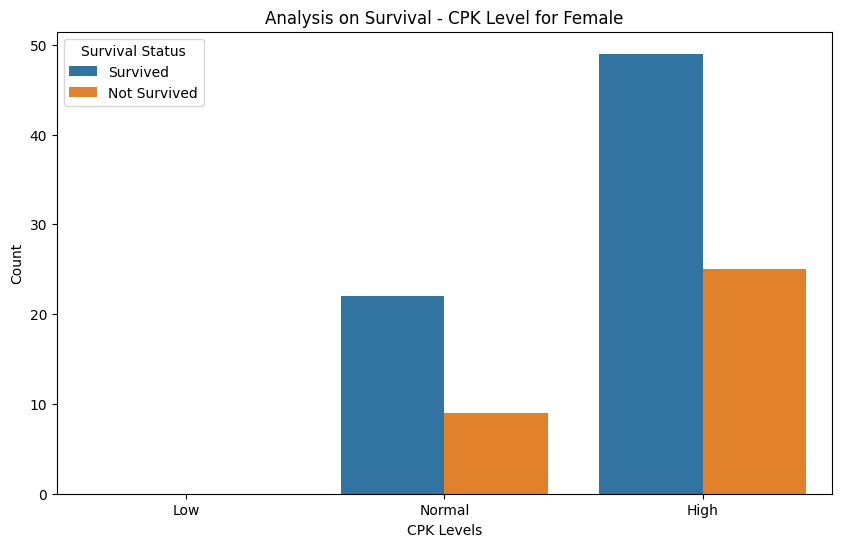

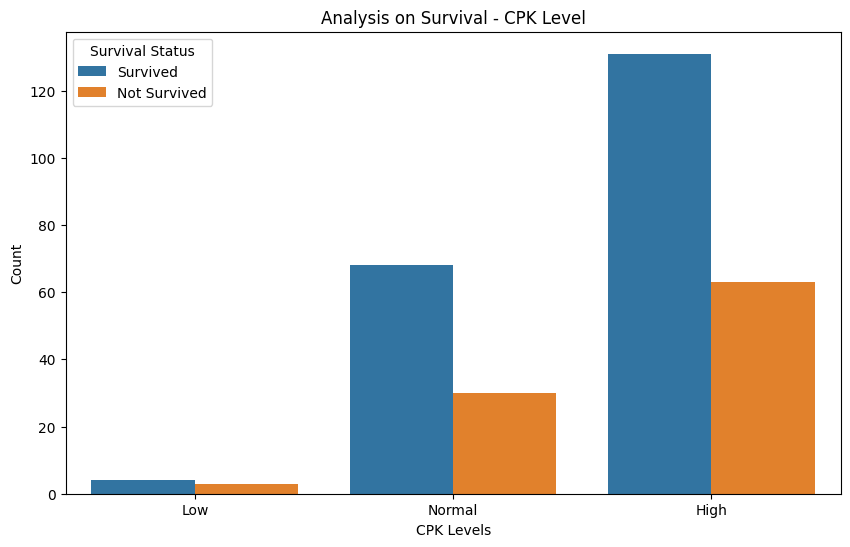

In [ ]:
# Creatinine Phosphokinase and Death Event
threshold_male = [55, 170]
threshold_female = [30, 135]

male_df['CPK_Category'] = pd.cut(male_df['creatinine_phosphokinase'], bins=[-np.inf, threshold_male[0], threshold_male[1], np.inf], labels=['Low', 'Normal', 'High'])
female_df['CPK_Category'] = pd.cut(female_df['creatinine_phosphokinase'], bins=[-np.inf, threshold_female[0], threshold_female[1], np.inf], labels=['Low', 'Normal', 'High'])

plt.figure(figsize=(10, 6))
sns.countplot(data=male_df, x='CPK_Category', hue='DEATH_EVENT')
plt.title('Analysis on Survival - CPK Level for Male')
plt.xlabel('CPK Levels')
plt.ylabel('Count')
plt.legend(title='Survival Status', labels=['Survived', 'Not Survived'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=female_df, x='CPK_Category', hue='DEATH_EVENT')
plt.title('Analysis on Survival - CPK Level for Female')
plt.xlabel('CPK Levels')
plt.ylabel('Count')
plt.legend(title='Survival Status', labels=['Survived', 'Not Survived'])
plt.show()

combined_data = pd.concat([male_df, female_df])

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='CPK_Category', hue='DEATH_EVENT')
plt.title('Analysis on Survival - CPK Level')
plt.xlabel('CPK Levels')
plt.ylabel('Count')
plt.legend(title='Survival Status', labels=['Survived', 'Not Survived'])
plt.show()

In [ ]:
diabetes_no = df[df['diabetes'] == 0]
diabetes_yes = df[df['diabetes'] == 1]

In [ ]:
# Diabetes and death
fig5 = go.Figure(go.Pie(values=[len(diabetes_no), len(diabetes_yes)], labels=['No Diabetes', 'Diabetes'],
                         title='Analysis on Survival - Diabetes'))
fig5.show()

In [ ]:
# Anaemia and heart failure
anaemia_no = df[df['anaemia'] == 0]
anaemia_yes = df[df['anaemia'] == 1]
fig6 = go.Figure(go.Pie(values=[len(anaemia_no), len(anaemia_yes)], labels=['Anaemia No', 'Anaemia Yes'],
                         title='Analysis on Survival - Anaemia'))
fig6.show()

In [ ]:
# High bp and heart failure
hbp_no = df[df['high_blood_pressure'] == 0]
hbp_yes = df[df['high_blood_pressure'] == 1]
fig7 = go.Figure(go.Pie(values=[len(hbp_no), len(hbp_yes)], labels=['HBP No', 'HBP Yes'],
                         title='Analysis on Survival - High Blood Pressure'))
fig7.show()

In [ ]:
# Smoking and heart failure
smoking_no = df[df['smoking'] == 0]
smoking_yes = df[df['smoking'] == 1]
fig8 = go.Figure(go.Pie(values=[len(smoking_no), len(smoking_yes)], labels=['Smoking No', 'Smoking Yes'],
                         title='Analysis on Survival - Smoking'))
fig8.show()

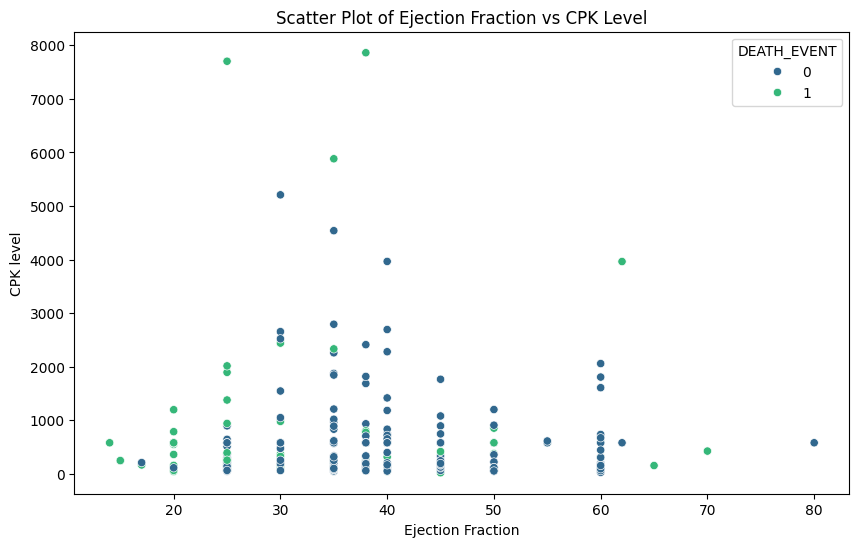

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ejection_fraction', y='creatinine_phosphokinase', hue='DEATH_EVENT', palette='viridis')

# Set the title and labels
plt.title('Scatter Plot of Ejection Fraction vs CPK Level')
plt.xlabel('Ejection Fraction')
plt.ylabel('CPK level')

# Show the plot
plt.show()

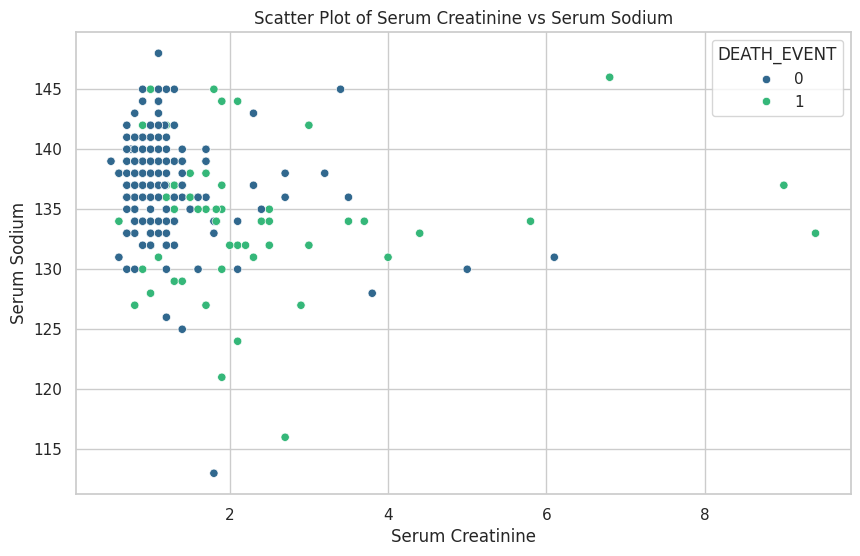

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='serum_creatinine', y='serum_sodium', hue='DEATH_EVENT', palette='viridis')

# Set the title and labels
plt.title('Scatter Plot of Serum Creatinine vs Serum Sodium')
plt.xlabel('Serum Creatinine')
plt.ylabel('Serum Sodium')

# Show the plot
plt.show()
